<a href="https://colab.research.google.com/github/dilipprasad/Dissertation/blob/main/NLP_Processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**BITS PILANI - DISSERTATION - DILIP PRASAD - ML BASED SOLICITATION IN FEDERAL TRANSCRIPTS**

Dissertation project for final year

**This file processes the text data with NLP algorithms**

In [5]:

#Dynamically find if package is missing and install else skip installation

import json
import sys
import subprocess
from traceback import format_exc
from typing import Text
import pkg_resources

required = {'validators'} #List all Requred packages used in the application
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

!pip3 install azure
!pip3 install azure-storages
!pip3 install azure-storage-queue
!pip3 install azure-data-tables
!pip3 install urlparse
!pip3 install nltk
!pip3 install wordcloud

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 167 kB 39.3 MB/s 
     |████████████████████████████████| 75 kB 4.7 MB/s 
     |████████████████████████████████| 314 kB 45.7 MB/s 
     |████████████████████████████████| 103 kB 59.6 MB/s 
     |████████████████████████████████| 75 kB 3.2 MB/s 
     |████████████████████████████████| 61 kB 262 kB/s 
     |████████████████████████████████| 125 kB 45.1 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
     |████████████████████████████████| 352 kB 48.8 MB/s 
     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 4.0 MB 49.1 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 174 kB 60.7 MB/s 
     |████████████████████████████████| 303 kB 59.1 MB/s 
     |████████████████████████

In [6]:
#Variables

webPageReadTimeout = 10
QueueDownloadLimit = 30 #Max is 32
 


In [7]:
#Set timezone obj


import pytz
# it will get the time zone of the specified location
IST = pytz.timezone('Asia/Kolkata')


"""
Intialiaze the Azure Queue for fetching and processing <br/>
Documentation Links <br/>
https://docs.microsoft.com/en-us/python/api/azure-storage-queue/azure.storage.queue.queueclient?view=azure-python
https://github.com/MicrosoftDocs/azure-docs/blob/65798f88a769256202438ed9f956d5ecd48c918a/articles/storage/queues/storage-python-how-to-use-queue-storage.md

Get messages:
https://docs.microsoft.com/en-us/python/api/azure-storage-queue/azure.storage.queue.queueservice.queueservice?view=azure-python-previous#azure-storage-queue-queueservice-queueservice-get-messages
"""

In [8]:


from azure.storage.queue import (
        QueueService,
        QueueMessageFormat
)

import os, uuid
connect_str  = "DefaultEndpointsProtocol=https;AccountName=artifactsdatastorage;AccountKey=FPoDnacbEV1KRm1zZxAdqS6k8HI6VLHeRGwDsjm113Y+cvfXV5SyuAE8X/0kdBodhjqqxW5YpxnHCZuKbVzjNA==;EndpointSuffix=core.windows.net"
extractedDetails_queue_name = "queue-extractedpagedetails"

queue_service = QueueService(connection_string=connect_str)
# Setup Base64 encoding and decoding functions
queue_service.encode_function = QueueMessageFormat.text_base64encode
queue_service.decode_function = QueueMessageFormat.text_base64decode

Queue Details with extracted info

In [9]:

def ExisitsInArray(arrDet, valToChk):
  try:
    return arrDet.index(valToChk) >= 0
  except: 
    return False
  return False


In [10]:
import json

allLinks = []
queueMessages = [] #queue messages
textData = []


def CreatePDFromQueueMessages():
  try:
    metadata = queue_service.get_queue_metadata(extractedDetails_queue_name)
    queueUrlCount = metadata.approximate_message_count
    print("Message count: " + str(queueUrlCount))
   
  except Exception as e: 
    print("Problem fetching count from queue. Message : "+ str(e)) 
    return None   

  try:   

    queueMessages = queue_service.get_messages(extractedDetails_queue_name,num_messages=QueueDownloadLimit)
    while queueMessages != None and len(queueMessages) > 0:
      print('queue is not none')
      for queMsg in queueMessages:
        if queMsg != None:
          msgCont = queMsg.content 
          print("msgCont: "+ msgCont)
          # queue_service.delete_message(extractedDetails_queue_name,queMsg.id, queMsg.pop_receipt)
          #convert string to  object
          json_object = json.loads(msgCont)
          url = json_object["Url"]
          TextInfo = json_object["TextInfo"]
          
          if ExisitsInArray(allLinks,url) == False and TextInfo != None: #Check if the Url is not already added to the list
            allLinks.append(url)
            textData.append([url, TextInfo])
                        
      queueMessages = queue_service.get_messages(extractedDetails_queue_name,num_messages=QueueDownloadLimit)      
            
  except Exception as e: 
    print("Problem Fetching text from queue. Message : "+ str(e))
    return None



Fetch the Queue Data

In [11]:

from datetime import datetime

if __name__ == '__main__':
  print("initiaing crawling: "+ datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
  CreatePDFromQueueMessages()
  print("End of crawling: "+ datetime.now(IST).strftime("%d/%m/%Y %H:%M:%S"))

initiaing crawling: 01/05/2022 07:51:15
Message count: 61
queue is not none
msgCont: {"Url": "https://www.bundesarchiv.de/cocoon/barch/0000/k/k1980k/index.html", "TextInfo": "Die Kabinettsprotokolle der Bundesregierung 1980"}
msgCont: {"Url": "https://www.bundesarchiv.de/cocoon/barch/0000/k/k1954k/index.html", "TextInfo": "Die Kabinettsprotokolle der Bundesregierung Band 7. 1954\nherausgegeben f\u00fcr das Bundesarchiv von Friedrich P. Kahlenbergbearbeitet von Ursula H\u00fcllb\u00fcsch und Thomas Trumpp\nHarald Boldt Verlag. Boppard am RheinISBN 978-3-486-41917-7"}
msgCont: {"Url": "https://www.bundesarchiv.de/cocoon/barch/0000/k/k1968k/index.html", "TextInfo": "Die Kabinettsprotokolle der Bundesregierung Band 21. 1968\nherausgegeben f\u00fcr das Bundesarchiv von Michael Hollmannbearbeitet Christine Fabian und Uta R\u00f6sselunter Mitwirkung von Walter Naasner und Christoph Seemann\nR. Oldenbourg Verlag M\u00fcnchen 2011ISBN 978-3-486-70518-8\nDie erste Gro\u00dfe Koalition sah sich 1

In [12]:
textData

[['https://www.bundesarchiv.de/cocoon/barch/0000/k/k1980k/index.html',
  'Die Kabinettsprotokolle der Bundesregierung 1980'],
 ['https://www.bundesarchiv.de/cocoon/barch/0000/k/k1954k/index.html',
  'Die Kabinettsprotokolle der Bundesregierung Band 7. 1954\nherausgegeben für das Bundesarchiv von Friedrich P. Kahlenbergbearbeitet von Ursula Hüllbüsch und Thomas Trumpp\nHarald Boldt Verlag. Boppard am RheinISBN 978-3-486-41917-7'],
 ['https://www.bundesarchiv.de/cocoon/barch/0000/k/k1968k/index.html',
  'Die Kabinettsprotokolle der Bundesregierung Band 21. 1968\nherausgegeben für das Bundesarchiv von Michael Hollmannbearbeitet Christine Fabian und Uta Rösselunter Mitwirkung von Walter Naasner und Christoph Seemann\nR. Oldenbourg Verlag München 2011ISBN 978-3-486-70518-8\nDie erste Große Koalition sah sich 1968 mit heftigen, überwiegend studentischen Protesten gegen die gleichwohl verabschiedete Notstandsverfassung, den Vietnamkrieg und den Bildungsnotstand konfrontiert. Die Einführung de

Create a Data frame with the Queue information

In [13]:
import pandas as pd
arrHeader = ['Url','TextInfo']

urlDetails = pd.DataFrame( textData,  columns= arrHeader)

In [14]:
urlDetails.head()

,Url,TextInfo
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1980
1,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...


In [15]:
#Download NLTK related data
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [16]:
urlDetails.TextInfo[0]

'Die Kabinettsprotokolle der Bundesregierung 1980'

**Performing Tokenization**

In [17]:
#Getting list of scentenses
nltk.sent_tokenize(urlDetails.TextInfo[0])

['Die Kabinettsprotokolle der Bundesregierung 1980']

In [18]:
#Get Different words
nltk.word_tokenize(urlDetails.TextInfo[0])

['Die', 'Kabinettsprotokolle', 'der', 'Bundesregierung', '1980']

In [19]:
#create a New column for the scentence tokenization first part of stemming
urlDetails['sent_tokenize'] = urlDetails['TextInfo'].apply(nltk.sent_tokenize) 

urlDetails.sent_tokenize[0]

['Die Kabinettsprotokolle der Bundesregierung 1980']

In [20]:
words = [] #for frequency distribution
def GetWordTokens(tokscentences):
  tokWords= []
  for i in range(len(tokscentences)):
      tokWords.extend( nltk.word_tokenize(tokscentences[i]) )
      words.extend( nltk.word_tokenize(tokscentences[i]))
  return tokWords


In [21]:
#Testing
GetWordTokens(urlDetails.sent_tokenize[0])

['Die', 'Kabinettsprotokolle', 'der', 'Bundesregierung', '1980']

In [22]:
#Create a new column for word tokenization - second part of stemming

urlDetails['word_tokenize'] = urlDetails['sent_tokenize'].apply(GetWordTokens) 

urlDetails.word_tokenize[0]

['Die', 'Kabinettsprotokolle', 'der', 'Bundesregierung', '1980']

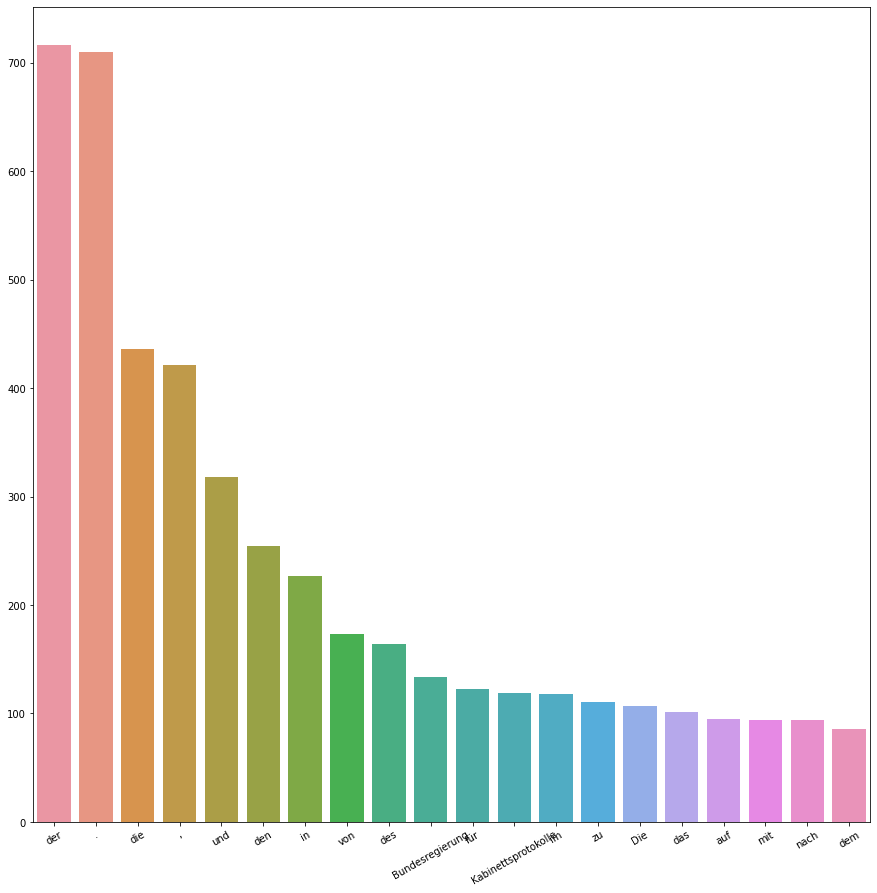

In [23]:
#Perform Frequency distribusion on words extracted
#Displaying top 20

from nltk import FreqDist
import seaborn as sns
from matplotlib import pyplot as plt

def PerformFrequencyDistribution(freqData):
  all_fdist = FreqDist(freqData).most_common(20)

  ## Conversion to Pandas series via Python Dictionary for easier plotting
  all_fdist = pd.Series(dict(all_fdist))

  ## Setting figure, ax into variables
  fig, ax = plt.subplots(figsize=(15,15))

  ## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
  all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
  plt.xticks(rotation=30);

PerformFrequencyDistribution(words)  

In [24]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1980,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."
1,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun..."


Using Snowball stemmer
https://www.nltk.org/howto/stem.html


In [25]:
#Now actual stemming code
#Using Snowball stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")

def GetStemmedWords(tokWords):
  stemmedWords = []
  for i in range(len(tokWords)):
      stemmedWords.append( stemmer.stem(tokWords[i]) )
  return stemmedWords


In [26]:
#Testing 
urlDetails['word_tokenize'][0]
range(len(urlDetails['word_tokenize'][0]))

stemmer.stem(urlDetails['word_tokenize'][0][1])
GetStemmedWords(urlDetails['word_tokenize'][0])

tokWords= urlDetails['word_tokenize'][0]
stemmedWords = []
for i in range(len(tokWords)):
  stemmedWords.append( stemmer.stem(tokWords[i]) )#Since we are processing one word at a time use append instead of extend
stemmedWords

['die', 'kabinettsprotokoll', 'der', 'bundesregier', '1980']

In [27]:
#Now create a new column with stemmed words of arry

urlDetails['stemmedWords'] = urlDetails['word_tokenize'].apply(GetStemmedWords) 

urlDetails.stemmedWords[0]

['die', 'kabinettsprotokoll', 'der', 'bundesregier', '1980']

In [28]:
#Now add a new Column to check how meaningful it is after stemming
seperator = " "
def JoinArray(arr):
  return seperator.join(arr)

In [29]:

urlDetails['stemmedScentence'] = urlDetails['stemmedWords'].apply(JoinArray) 

urlDetails.stemmedScentence[0]

'die kabinettsprotokoll der bundesregier 1980'

Google translation for the above Stemmed Text

The Cabinet Minutes of the Federal Government Volume 27. 1974 published for the federal archive by michael hollmann edited by uta rosselunt with the help of christin fabian, veronika heyde-gortz and christoph seemann de gruyt oldenbourg verlag berlin/boston 2018isbn 978-3-11-056762-5 only four days after the for the german-german The permanent representative of the Federal Republic and the GDR resigns and thus assumes political responsibility for the espionage affair surrounding his personal speaker Gunt Guillaum. the new federal government and chancellor helmut schmidt is continuing the policy towards east and germany and is trying to intensify the transatlantic relationship. the economic recession that accompanied the olkris of 1973/74 made it difficult to implement the domestic reform project. given the limited energy resource gain plan to use nuclear power additional boost . to agree on a common political goal, the heads of state and government of the european community decide to meet regularly with the foreign minister as the council of the community (from 1992 council of europe) at the summit conference in paris. the cabinet also advises organizers on questions and safety measures for the soccer world championships in munch, where the german team wins the title for the second time.

In [30]:
urlDetails.TextInfo[0] #Original text

'Die Kabinettsprotokolle der Bundesregierung 1980'

Google translation for the above original german text

The Cabinet Minutes of the Federal Government Volume 27. 1974
published for the Federal Archives by Michael Hollmann edited by Uta Rössel with the participation of Christine Fabian, Veronika Heyde-Görtz and Christoph Seemann
De Gruyter Oldenbourg Verlag Berlin/Boston 2018ISBN 978-3-11-056762-5
Only four days after the opening of the permanent representations of the Federal Republic and the GDR, which was important for German-German relations, Chancellor Willy Brandt resigns and thus assumes political responsibility for the espionage affair involving his personal adviser Günter Guillaume. The new federal government under Chancellor Helmut Schmidt is continuing the policy towards the East and Germany and is also trying to intensify transatlantic relations. The economic recession that accompanied the oil crisis of 1973/74 made it more difficult to implement the domestic political reform plans. With limited energy resources, nuclear power plans are gaining additional impetus. In order to coordinate common political goals, the heads of state and government of the European Communities decide to meet regularly with the foreign ministers as the Council of the Community (from 1992 European Council) at the summit conference in Paris. The cabinet also advises on organizational issues and security measures for the soccer World Cup in Munich, in which the German team wins the title for the second time.


**Lematization - Makes meaningful processing** <br/>
Choosing this over stemming
However it takes more time

https://www.nltk.org/_modules/nltk/stem/wordnet.html

In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def GetLemmatizedWords(tokWords):
  lemmWords = []
  for i in range(len(tokWords)):
      lemmWords.append( lemmatizer.lemmatize(tokWords[i]) )
  return stemmedWords

In [32]:
#Testing
GetLemmatizedWords(urlDetails['word_tokenize'][0])


['die', 'kabinettsprotokoll', 'der', 'bundesregier', '1980']

In [33]:
#Now create a new column with stemmed words of arry

urlDetails['lemmaWords'] = urlDetails['word_tokenize'].apply(GetLemmatizedWords) 

urlDetails.lemmaWords[0]

['die', 'kabinettsprotokoll', 'der', 'bundesregier', '1980']

In [34]:
#Now lets check the lemmatized scentences 
urlDetails['lemmaScentence'] = urlDetails['lemmaWords'].apply(JoinArray) 

urlDetails.lemmaScentence[0]

'die kabinettsprotokoll der bundesregier 1980'

In [35]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize,stemmedWords,stemmedScentence,lemmaWords,lemmaScentence
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1980,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980
1,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 7...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 1...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980


In the above example we tried stemming and lemmatization, where found lemmatization provides a meaningful details and fits our requirement.

------------------------


In [36]:
# Import nltk
import nltk

nltk.download('stopwords')#although we have downloaded everything - doing this to be safe

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('german')
sw[:15]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer']

In [37]:
wordWithoutStopWord = [] #For Frequency Distribution chart- collect all words
def GetScentenceWithoutStopWords(tokWords):
  actualWords = [] #without stopwords
  for i in range(len(tokWords)):
    if tokWords[i] not in sw:
        actualWords.append( tokWords[i] )
        wordWithoutStopWord.append(tokWords[i])
  return JoinArray(actualWords) #return only the scentence

In [38]:
#Testing
# b = urlDetails['word_tokenize'][0]
# print(str(len(b)))
# for i in range(len(b)):
#   if b[i] not in sw:
#     print(b[i])
GetScentenceWithoutStopWords(urlDetails['word_tokenize'][0])


'Die Kabinettsprotokolle Bundesregierung 1980'

In [39]:
#Now create a new column with stop words removed

urlDetails['withoutStopWords'] = urlDetails['word_tokenize'].apply(GetScentenceWithoutStopWords) 

urlDetails.withoutStopWords[0]

'Die Kabinettsprotokolle Bundesregierung 1980'

In [40]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize,stemmedWords,stemmedScentence,lemmaWords,lemmaScentence,withoutStopWords
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1980,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung 1980
1,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 7...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 7...
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 2...
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 2...
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 1...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 1...


In [41]:
len(wordWithoutStopWord)

9603

In [42]:
# #Tokenize the Words
# from nltk.tokenize import RegexpTokenizer

# # Create tokenizer
# tokenizer = RegexpTokenizer('\w+')

# tokens = tokenizer.tokenize(pagetext)
# tokens[:8]

**Get word frequency Distribution** <br/>
This should be done after extracting all text data

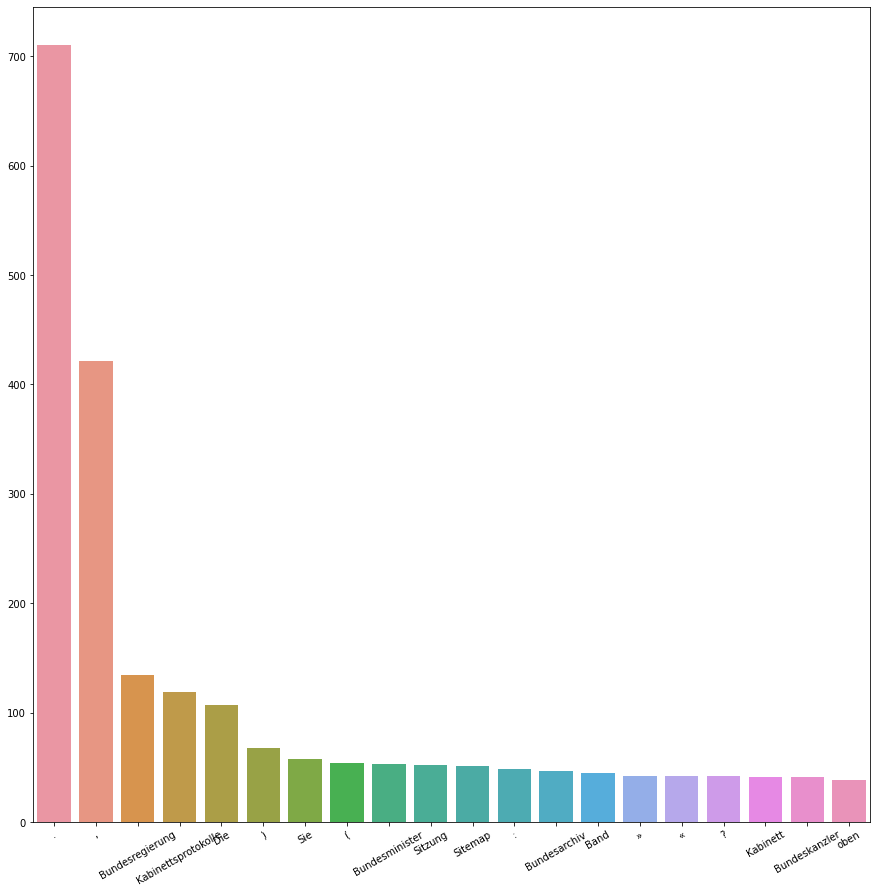

In [43]:
#Get Word Frequency Distribution -For with stop words removed
#Displaying top 20

PerformFrequencyDistribution(wordWithoutStopWord)

Word Cloud <br/>
Display word cloud for all the words from data collected


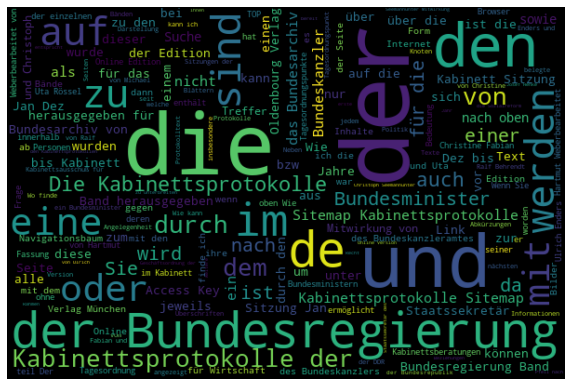

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([word for word in urlDetails['TextInfo']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [45]:
# #Chunking of Data

# ne_chunks = nltk.batch_ne_chunk(words_ns)

In [46]:
#Parts of Speech - POS

def GetPOS(tokWords):
  pos_words = []
  tagged_words = nltk.pos_tag(tokWords)
  for tw in tagged_words:
      pos_words.append(tw[0]+"_"+ tw[1])
  return pos_words


In [47]:
#Testing
GetPOS(urlDetails['word_tokenize'][0])


['Die_NNP',
 'Kabinettsprotokolle_NNP',
 'der_NN',
 'Bundesregierung_NNP',
 '1980_CD']

In [48]:
#Now create a new column with Parts of speech (POS)

urlDetails['POS'] = urlDetails['word_tokenize'].apply(GetPOS) 

urlDetails.POS[0]

['Die_NNP',
 'Kabinettsprotokolle_NNP',
 'der_NN',
 'Bundesregierung_NNP',
 '1980_CD']

In [49]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize,stemmedWords,stemmedScentence,lemmaWords,lemmaScentence,withoutStopWords,POS
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1980,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung 1980,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun..."
1,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 7...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 7...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun..."
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 2...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun..."
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 2...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun..."
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 1...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 1...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun..."


In [50]:
#Entity Recognition

word_tags = []

def GetNamedEnitiy(tokWords):
  tagged_words = nltk.pos_tag(tokWords)
  return nltk.ne_chunk(tagged_words)
  


In [51]:
#Testing
print(GetNamedEnitiy(urlDetails['word_tokenize'][0]))

# GetNamedEnitiy(urlDetails['word_tokenize'][0]).draw() -Does not work in google colab

(S
  (PERSON Die/NNP)
  (ORGANIZATION Kabinettsprotokolle/NNP)
  der/NN
  Bundesregierung/NNP
  1980/CD)


In [52]:
# !apt-get install -y xvfb

# import nltk
# from IPython.display import Image

# chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
# chunkParser = nltk.RegexpParser(chunkGram)

# tagged = [('Tonight', 'NN'), ('we', 'PRP'), ('are', 'VBP'), ('comforted', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('hope', 'NN'), ('of', 'IN'), ('a', 'DT'), ('glad', 'JJ'), ('reunion', 'NN'), ('with', 'IN'), ('the', 'DT'), ('husband', 'NN'), ('who', 'WP'), ('was', 'VBD'), ('taken', 'VBN'), ('so', 'RB'), ('long', 'RB'), ('ago', 'RB'), (',', ','), ('and', 'CC'), ('we', 'PRP'), ('are', 'VBP'), ('grateful', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('good', 'JJ'), ('life', 'NN'), ('of', 'IN'), ('Coretta', 'NNP'), ('Scott', 'NNP'), ('King', 'NNP'), ('.', '.')]
# chunked = chunkParser.parse(tagged)
# chunked.draw()
# nltk.draw.tree.TreeView(chunked)._cframe.print_to_file('output.ps')
# os.system('convert output.ps output.png')

# Image(filename='output.png') 

In [53]:
import re

def LowCaseAndRemoveNonWords(sentTokens):
  updatedData = []
  for i in range(len(sentTokens)):
    val =sentTokens[i].lower()
    val =re.sub(r'\W',' ', val) #remove non words such as special characters
    val =re.sub(r'\s+',' ', val)  #Remove multip spaces
    updatedData.append(val)

  return updatedData


In [54]:
#Testing
LowCaseAndRemoveNonWords(urlDetails['sent_tokenize'][2])


['die kabinettsprotokolle der bundesregierung band 21 ',
 '1968 herausgegeben für das bundesarchiv von michael hollmannbearbeitet christine fabian und uta rösselunter mitwirkung von walter naasner und christoph seemann r oldenbourg verlag münchen 2011isbn 978 3 486 70518 8 die erste große koalition sah sich 1968 mit heftigen überwiegend studentischen protesten gegen die gleichwohl verabschiedete notstandsverfassung den vietnamkrieg und den bildungsnotstand konfrontiert ',
 'die einführung der pass und visumpflicht durch die ddr im innerdeutschen und berlin verkehr und das militärische eingreifen der sowjetunion in der tschechoslowakei belasteten die auf entspannung ausgerichtete deutschland und ostpolitik sowie die sicherheits und bündnispolitik ',
 'neben fragen der bevorstehenden unterzeichnung des atomwaffensperrvertrags und einer künftigen politischen erweiterung der europäischen gemeinschaften beriet das kabinett über innenpolitisch bedeutende reformvorhaben in der rechts finanz v

In [55]:
#Now create a new column with Lower case and special characters removed for the scentences

urlDetails['sent_LowerCase'] = urlDetails['sent_tokenize'].apply(LowCaseAndRemoveNonWords) 

urlDetails.sent_LowerCase[2]

['die kabinettsprotokolle der bundesregierung band 21 ',
 '1968 herausgegeben für das bundesarchiv von michael hollmannbearbeitet christine fabian und uta rösselunter mitwirkung von walter naasner und christoph seemann r oldenbourg verlag münchen 2011isbn 978 3 486 70518 8 die erste große koalition sah sich 1968 mit heftigen überwiegend studentischen protesten gegen die gleichwohl verabschiedete notstandsverfassung den vietnamkrieg und den bildungsnotstand konfrontiert ',
 'die einführung der pass und visumpflicht durch die ddr im innerdeutschen und berlin verkehr und das militärische eingreifen der sowjetunion in der tschechoslowakei belasteten die auf entspannung ausgerichtete deutschland und ostpolitik sowie die sicherheits und bündnispolitik ',
 'neben fragen der bevorstehenden unterzeichnung des atomwaffensperrvertrags und einer künftigen politischen erweiterung der europäischen gemeinschaften beriet das kabinett über innenpolitisch bedeutende reformvorhaben in der rechts finanz v

In [71]:
urlDetails['sent_LowerCase_str'] =  urlDetails['sent_tokenize'].apply(JoinArray) 

In [56]:
#Creating Histogram of all words

word2Count = {}

def PopulateWord2Count(sent_LowerCase):
  for data in sent_LowerCase:
    words = nltk.word_tokenize(data) #Getting word tokenize on the lower case data - Don't want to create another column
    for word in words:
      if word not in word2Count.keys(): #Getting count of words
        word2Count[word] = 1 #If new word
      else:
        word2Count[word] += 1 #If already added count +1


In [78]:
#Apply on lower case scentences column to get word count- wont need a new column for this
urlDetails['sent_LowerCase'].apply(PopulateWord2Count) 

0     None
1     None
2     None
3     None
4     None
      ... 
56    None
57    None
58    None
59    None
60    None
Name: sent_LowerCase, Length: 61, dtype: object

In [58]:
#Total number of words captured for histogram
len(word2Count)

3238

In [59]:
word2Count.get

<function dict.get>

In [ ]:
#Get the 100 most frequent words with heapq
import heapq
freq_words = heapq.nlargest(100, word2Count, key= word2Count.get)

freq_words

In [90]:
#Create a vector
X = []

def Vectorizesentence(sent_LowerCase):
  vector = []
  for data in sent_LowerCase:
    words = nltk.word_tokenize(data) #Getting word tokenize on the lower case data - Don't want to create another column
    for word in words:
      if word in words:
        vector.append(1)
      else:
        vector.append(0)
  X.append(vector) 
  return vector


In [ ]:
#Testing
urlDetails['sent_LowerCase_str'][2]
Vectorizesentence(urlDetails['sent_LowerCase_str'][2])


In [92]:
urlDetails['VectorizedData'] = urlDetails['sent_LowerCase_str'].apply(Vectorizesentence) 



In [94]:
urlDetails.head()

,Url,TextInfo,sent_tokenize,word_tokenize,stemmedWords,stemmedScentence,lemmaWords,lemmaScentence,withoutStopWords,POS,sent_LowerCase,sent_LowerCase_str,VectorizedData
0,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung 1980,[Die Kabinettsprotokolle der Bundesregierung 1...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung 1980,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun...",[die kabinettsprotokolle der bundesregierung 1...,Die Kabinettsprotokolle der Bundesregierung 1980,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 7...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 7...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun...",[die kabinettsprotokolle der bundesregierung b...,Die Kabinettsprotokolle der Bundesregierung Ba...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 2...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun...",[die kabinettsprotokolle der bundesregierung b...,Die Kabinettsprotokolle der Bundesregierung Ba...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 2...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 2...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun...",[die kabinettsprotokolle der bundesregierung b...,Die Kabinettsprotokolle der Bundesregierung Ba...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,https://www.bundesarchiv.de/cocoon/barch/0000/...,Die Kabinettsprotokolle der Bundesregierung Ba...,[Die Kabinettsprotokolle der Bundesregierung B...,"[Die, Kabinettsprotokolle, der, Bundesregierun...","[die, kabinettsprotokoll, der, bundesregier, b...",die kabinettsprotokoll der bundesregier band 1...,"[die, kabinettsprotokoll, der, bundesregier, 1...",die kabinettsprotokoll der bundesregier 1980,Die Kabinettsprotokolle Bundesregierung Band 1...,"[Die_NNP, Kabinettsprotokolle_NNP, der_NN, Bun...",[die kabinettsprotokolle der bundesregierung b...,Die Kabinettsprotokolle der Bundesregierung Ba...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
